In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-12 13:25:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.134.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   130MB/s    in 0.5s    

2020-07-12 13:25:36 (130 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/cats_and_dogs_filtered')

['train', 'vectorize.py', 'validation']

In [ ]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['dogs', 'cats']

In [ ]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))

1000
1000


In [ ]:
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_dogs_dir=os.path.join(train_dir,'dogs')
train_cats_dir=os.path.join(train_dir,'cats')

val_dogs_dir=os.path.join(validation_dir,'dogs')
val_cats_dir=os.path.join(validation_dir,'cats')

In [ ]:
train_cats_filenames=os.listdir(train_cats_dir)
train_cats_filenames[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

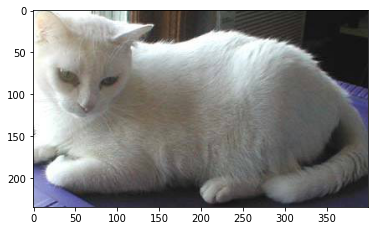

In [ ]:
plt.imshow(plt.imread(os.path.join(train_cats_dir,train_cats_filenames[0])))

In [ ]:
import random

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
img,labels=train_generator.next()
print(img.shape)
print(labels.shape)

(20, 150, 150, 3)
(20,)


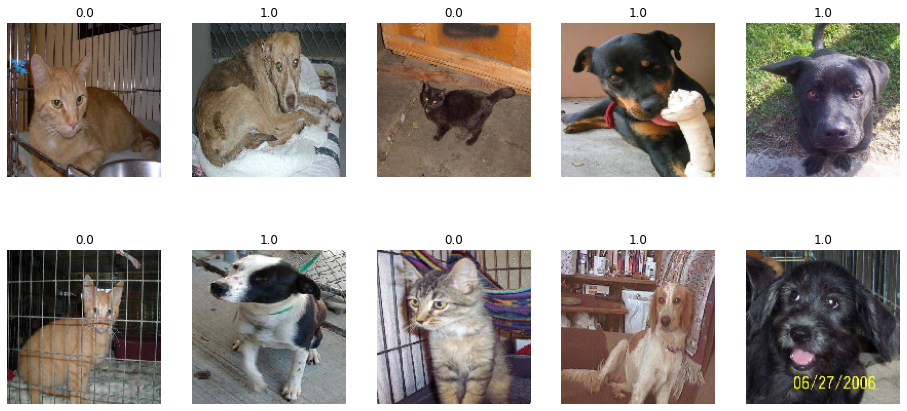

In [ ]:
plt.figure(figsize=(16,16))
for i in range(10):
  plt.subplot(4,5,i+1)
  plt.imshow(img[i,:,:,:])
  plt.title(labels[i])
  plt.axis("off")

In [ ]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model = Sequential()
## add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
### Compiling the model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 56s 562ms/step - loss: 0.7393 - accuracy: 0.5605 - val_loss: 0.6285 - val_accuracy: 0.6790
Epoch 2/15
100/100 [==============================] - 56s 559ms/step - loss: 0.6132 - accuracy: 0.6655 - val_loss: 0.5768 - val_accuracy: 0.7140
Epoch 3/15
100/100 [==============================] - 56s 563ms/step - loss: 0.5210 - accuracy: 0.7520 - val_loss: 0.5547 - val_accuracy: 0.7280
Epoch 4/15
100/100 [==============================] - 57s 566ms/step - loss: 0.4501 - accuracy: 0.7940 - val_loss: 0.5278 - val_accuracy: 0.7530
Epoch 5/15
100/100 [==============================] - 57s 568ms/step - loss: 0.3669 - accuracy: 0.8360 - val_loss: 0.5786 - val_accuracy: 0.7400
Epoch 6/15
100/100 [==============================] - 57s 572ms/step - loss: 0.2893 - accuracy: 0.8830 - val_loss: 0.6696 - val_accuracy: 0.7250
Epoch 7/15
100/100 [==============================] - 57s 572ms/step - loss: 0.2016 - accuracy: 0.9140 - val_loss: 0.7753 - val_ac

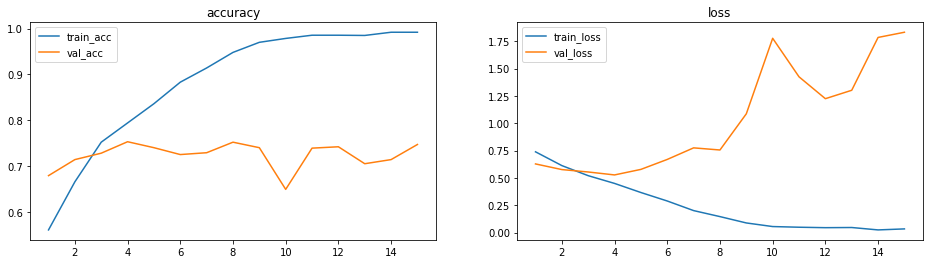

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

### Another Modeling

In [ ]:
model1 = Sequential()
## add a conv layer followed by maxpooling
model1.add(Conv2D(128,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model1.add(Flatten())
# Fully connected layer with 512 neurons
model1.add(Dense(512,activation='relu'))
## Final output layer
model1.add(Dense(1,activation='softmax'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
history1=model.fit(train_generator,epochs=7,validation_data=validation_generator,batch_size=32)

Epoch 1/7
100/100 [==============================] - 57s 567ms/step - loss: 0.0243 - accuracy: 0.9950 - val_loss: 1.7819 - val_accuracy: 0.7500
Epoch 2/7
100/100 [==============================] - 57s 568ms/step - loss: 0.0097 - accuracy: 0.9945 - val_loss: 1.9241 - val_accuracy: 0.7260
Epoch 3/7
100/100 [==============================] - 57s 568ms/step - loss: 0.0613 - accuracy: 0.9920 - val_loss: 2.1567 - val_accuracy: 0.7390
Epoch 4/7
100/100 [==============================] - 57s 570ms/step - loss: 0.0506 - accuracy: 0.9870 - val_loss: 2.1260 - val_accuracy: 0.7530
Epoch 5/7
100/100 [==============================] - 57s 568ms/step - loss: 0.0506 - accuracy: 0.9925 - val_loss: 1.8120 - val_accuracy: 0.7090
Epoch 6/7
100/100 [==============================] - 57s 570ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 2.3346 - val_accuracy: 0.7350
Epoch 7/7
100/100 [==============================] - 57s 570ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 2.2271 - val_accuracy:

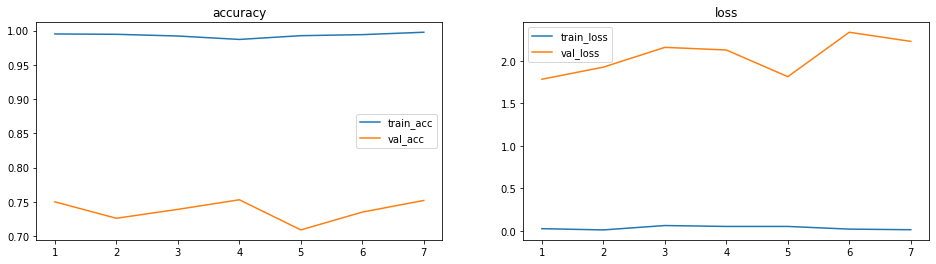

In [ ]:
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = list(range(1,8))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

### First model is underfitting
 - Accuracy is increasing and loss is decreasing
###Second model is overfitting
 - Acurracy is 1.0 which mean 100% and no loss